In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import files

In [2]:
file = pd.read_csv(r'/home/gdeandrea/Scaricati/Econofisica-RNDM - Foglio1.csv', header=14)

In [3]:
file = file.replace(',','.', regex=True)
file = file.drop('chisq_soglie', axis=1)
file = file.drop('chisq_soglini', axis=1)
file = file.drop('commenti', axis=1)

In [4]:
for column in file.columns:
    
    file[column] = pd.to_numeric(file[column])

file.head(20)

,rndm %,soglia,err_soglia,soglino,err_soglino,durate,errore,tempiattesa,errore.1,ampiezze,errore.2,sigma_soglia,sigma_baseline,numero rivolte,numero rivoltini,numero spike,#tick
0,0.0000,119.85,8.44,0.00,0.00,10.31,0.12,17.85,1.050,193.60,14.66,3.0,3.0,34.0,1.0,38.0,980.0
1,0.0025,130.55,6.82,24.86,7.22,10.46,0.20,17.20,1.024,207.34,12.29,3.0,3.0,33.0,4.0,42.0,990.0
2,0.0050,140.86,7.99,20.14,9.32,10.24,0.12,17.39,1.280,222.49,14.56,3.0,3.0,31.0,6.0,38.0,990.0
3,0.0075,102.80,8.53,22.25,4.71,10.36,0.18,10.54,1.100,175.88,13.68,3.0,3.0,33.0,8.0,42.0,842.0
4,0.0100,100.39,12.31,18.68,6.63,10.25,0.15,15.12,1.660,156.36,21.86,3.0,3.0,33.0,6.0,41.0,990.0
5,0.0125,119.01,10.40,19.32,4.80,9.79,0.16,17.43,1.940,181.31,19.42,3.0,3.0,30.0,6.0,37.0,990.0
6,0.0150,89.65,6.19,32.10,3.30,10.33,0.21,7.65,0.830,158.70,9.21,3.0,3.0,28.0,19.0,51.0,731.0
7,0.0175,127.64,7.27,15.28,4.70,9.84,0.10,14.97,1.430,205.22,12.71,3.0,3.0,31.0,10.0,44.0,990.0
8,0.0200,166.15,6.20,26.38,7.16,10.99,0.10,16.32,1.020,242.71,14.03,3.0,3.0,31.0,3.0,36.0,990.0
9,0.0300,73.92,4.46,13.30,4.73,10.20,0.33,7.69,0.840,129.64,6.80,3.0,3.0,32.0,18.0,57.0,707.0


# Correlation

In [5]:
correlation_df = file.corr()
correlation_df = correlation_df[correlation_df.columns[0]]
correlation_df

rndm %              1.000000
soglia             -0.327901
err_soglia          0.022047
soglino             0.356666
err_soglino        -0.067064
durate             -0.074801
errore              0.566187
tempiattesa        -0.408494
errore.1           -0.311865
ampiezze           -0.416849
errore.2           -0.195286
sigma_soglia             NaN
sigma_baseline           NaN
numero rivolte     -0.396282
numero rivoltini    0.500760
numero spike        0.485967
#tick              -0.289135
Name: rndm %, dtype: float64

In [6]:
correlation_df.index

Index(['rndm %', 'soglia', 'err_soglia', 'soglino', 'err_soglino', 'durate',
       'errore', 'tempiattesa', 'errore.1', 'ampiezze', 'errore.2',
       'sigma_soglia', 'sigma_baseline', 'numero rivolte', 'numero rivoltini',
       'numero spike', '#tick'],
      dtype='object')

In [7]:
import scipy.stats as stats

pearson_pvalue_dict={}
col_list = []

for col2 in file.columns:
    pearson_coeff, p_value = stats.pearsonr(file[file.columns[0]], file[col2])
    pearson_pvalue_dict['rndm-'+col2] = [pearson_coeff, p_value]
       
pearson_pvalue_df = pd.DataFrame.from_dict(pearson_pvalue_dict,
                                           orient='index',
                                           columns=['Pearson Coeff', 'P-Value'])

pearson_pvalue_df.sort_values(by=['Pearson Coeff'], ascending=False)

/home/gdeandrea/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


,Pearson Coeff,P-Value
rndm-rndm %,1.000000,0.000000
rndm-errore,0.566187,0.043677
rndm-numero rivoltini,0.500760,0.081327
rndm-numero spike,0.485967,0.092236
rndm-soglino,0.356666,0.231599
rndm-err_soglia,0.022047,0.943009
rndm-err_soglino,-0.067064,0.827676
rndm-durate,-0.074801,0.808113
rndm-errore.2,-0.195286,0.522583
rndm-#tick,-0.289135,0.337997


# ScatterPlots

## GradoRNDM vs Soglia vs #Rivolte

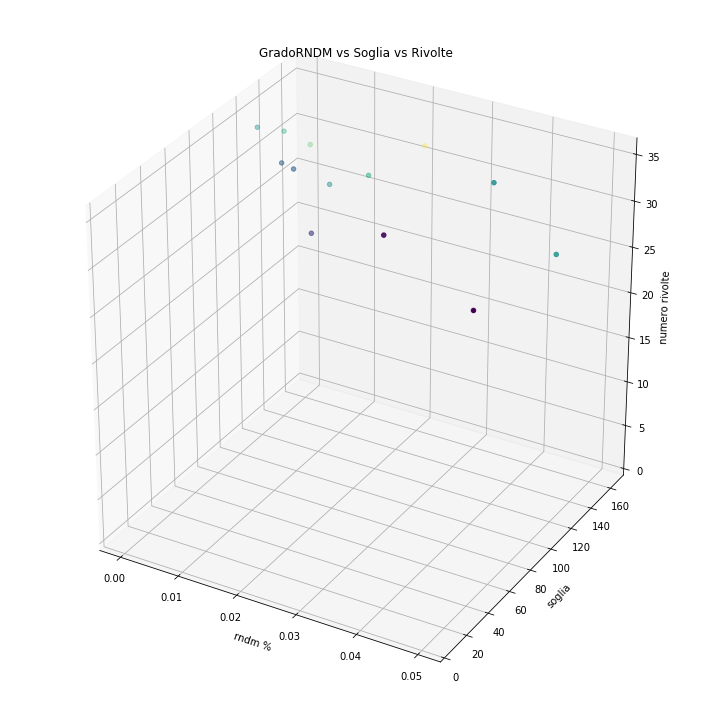

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[1]], file[file.columns[-4]], c=file[file.columns[1]])
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[1])
ax.set_zlabel(file.columns[-4])
ax.set_title('GradoRNDM vs Soglia vs Rivolte')
ax.set_ybound(0,170)
ax.set_zbound(0,36)
plt.tight_layout()


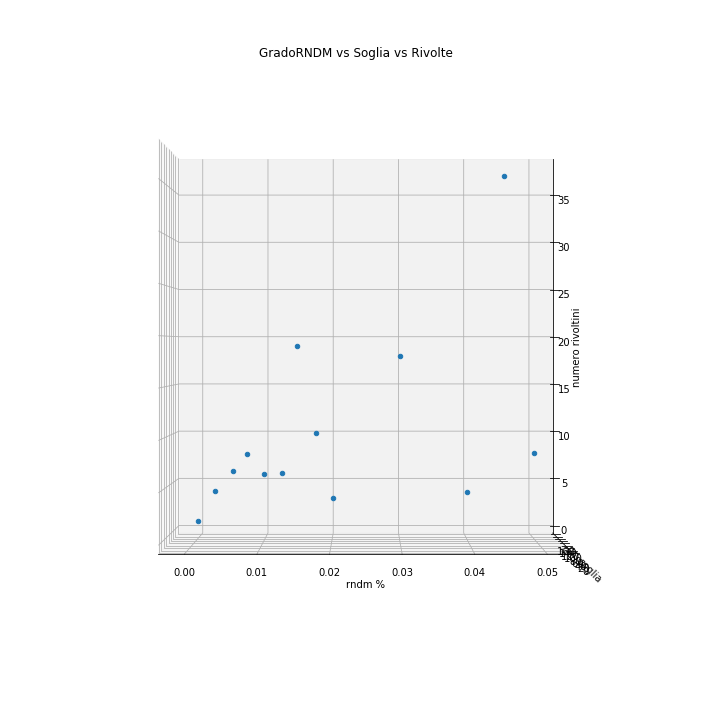

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[1]], file[file.columns[-3]], depthshade=False)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[1])
ax.set_zlabel(file.columns[-3])
ax.set_title('GradoRNDM vs Soglia vs Rivolte')
ax.set_ybound(0,170)
ax.set_zbound(0,38)
ax.view_init(0, 270)
plt.tight_layout()
plt.show()


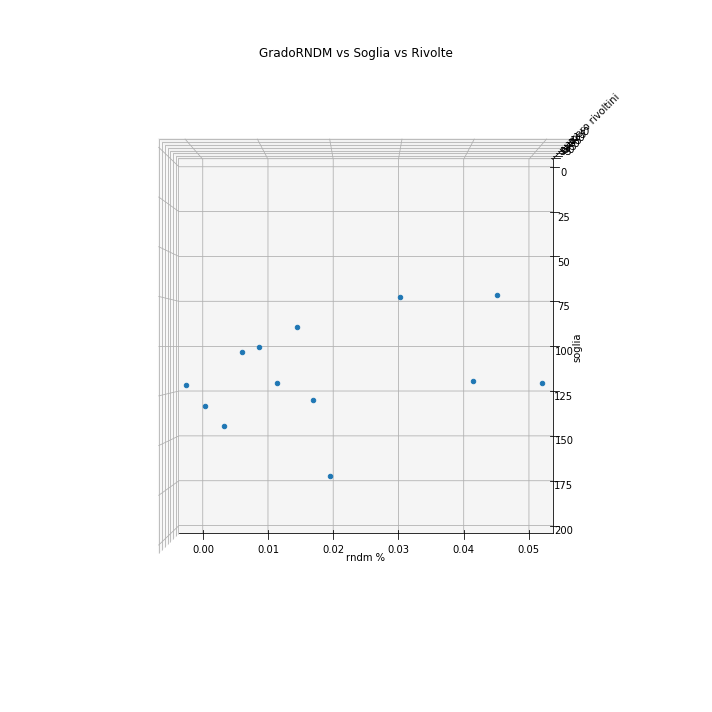

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[1]], file[file.columns[-3]], depthshade=False)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[1])
ax.set_zlabel(file.columns[-3])
ax.set_title('GradoRNDM vs Soglia vs Rivolte')
ax.set_ybound(0,200)
ax.set_zbound(0,36)
ax.view_init(270, 270)
plt.tight_layout()
plt.show()


## GradoRNDM vs Soglini vs #Rivoltini

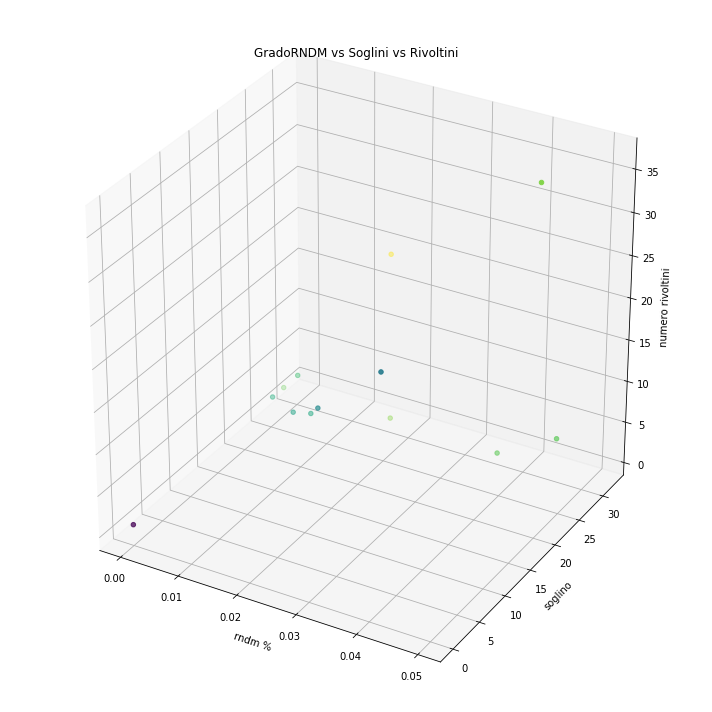

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[3]], file[file.columns[-3]], c=file[file.columns[3]])
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[3])
ax.set_zlabel(file.columns[-3])
ax.set_title('GradoRNDM vs Soglini vs Rivoltini')
#ax.set_ybound(0,170)
#ax.set_zbound(0,36)
plt.tight_layout()
plt.show()


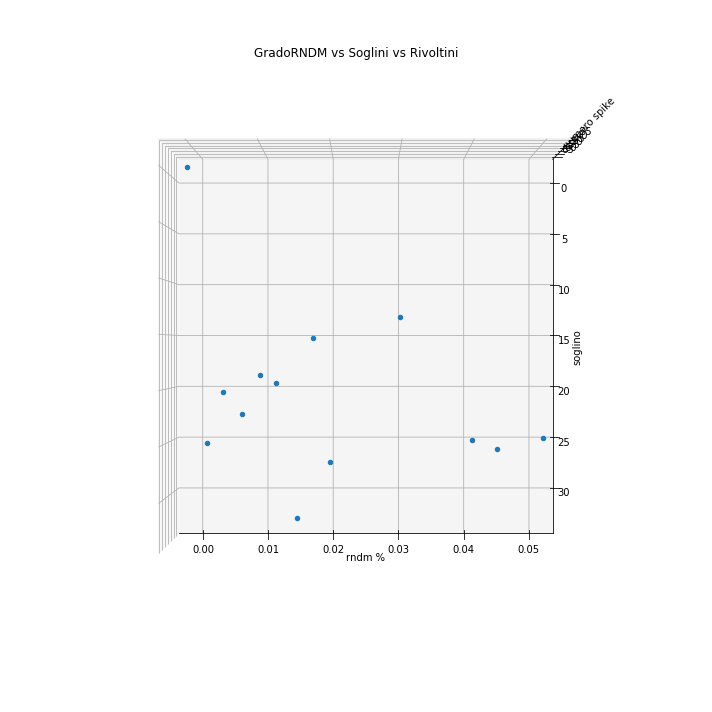

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[3]], file[file.columns[-2]], depthshade=False)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[3])
ax.set_zlabel(file.columns[-2])
ax.set_title('GradoRNDM vs Soglini vs Rivoltini')
#ax.set_ybound(0,170)
#ax.set_zbound(0,36)
ax.view_init(270, 270)
plt.tight_layout()
plt.show()


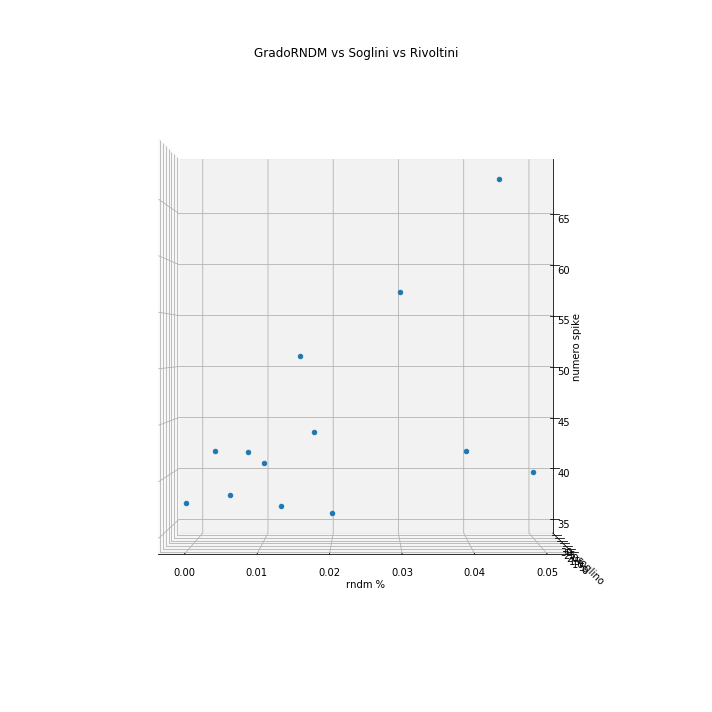

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[3]], file[file.columns[-2]], depthshade=False)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[3])
ax.set_zlabel(file.columns[-2])
ax.set_title('GradoRNDM vs Soglini vs Rivoltini')
#ax.set_ybound(0,170)
#ax.set_zbound(0,36)
ax.view_init(0, 270)
plt.tight_layout()
plt.show()


## GradoRNDM vs #Rivolte vs #Rivoltini

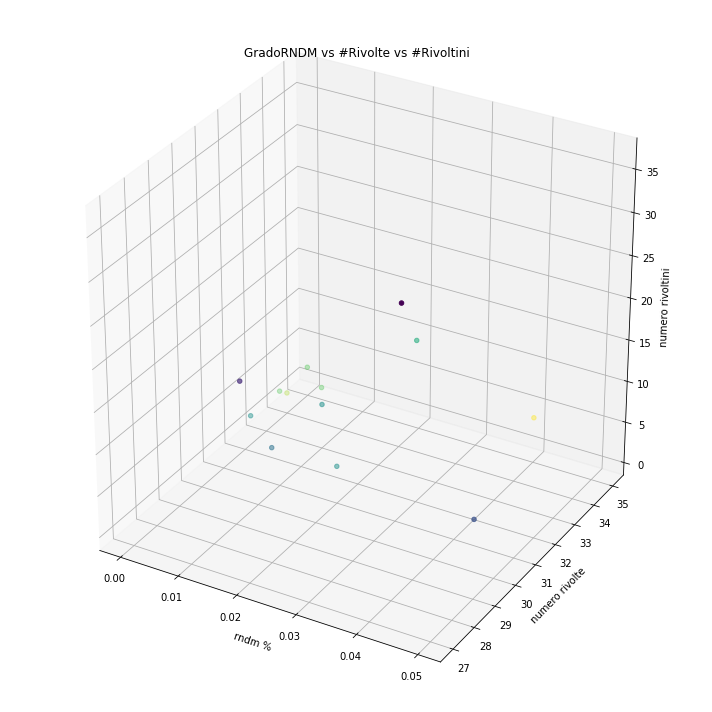

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[-4]], file[file.columns[-3]], c=file[file.columns[-4]])
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[-4])
ax.set_zlabel(file.columns[-3])
ax.set_title('GradoRNDM vs #Rivolte vs #Rivoltini')
#ax.set_ybound(0,170)
#ax.set_zbound(0,36)
plt.tight_layout()
plt.show()


# Plot metriche rivolte vs grado rndm

## Valori Soglie

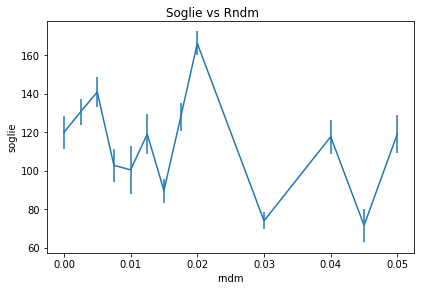

In [15]:
plt.suptitle('Soglie vs Rndm', y=1)
plt.errorbar(file[file.columns[0]], file[file.columns[1]], yerr=file[file.columns[2]])
plt.ylabel('soglie')
plt.xlabel('rndm')
plt.tight_layout()
plt.show()

## Soglini

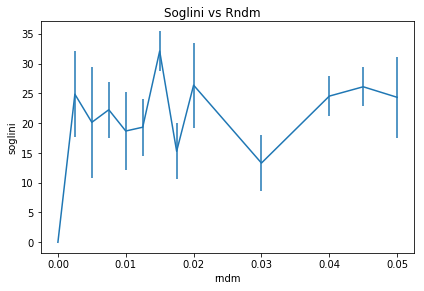

In [16]:
plt.suptitle('Soglini vs Rndm', y=1)
plt.errorbar(file[file.columns[0]], file['soglino'], yerr=file['err_soglino'])
plt.ylabel('soglini')
plt.xlabel('rndm')
plt.tight_layout()
plt.show()

## Ampiezze

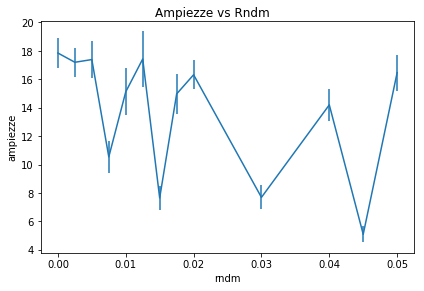

In [17]:
plt.suptitle('Ampiezze vs Rndm', y=1)
plt.errorbar(file[file.columns[0]], file[file.columns[7]], yerr=file[file.columns[8]])
plt.ylabel('ampiezze')
plt.xlabel('rndm')
plt.tight_layout()
plt.show()

## Durate

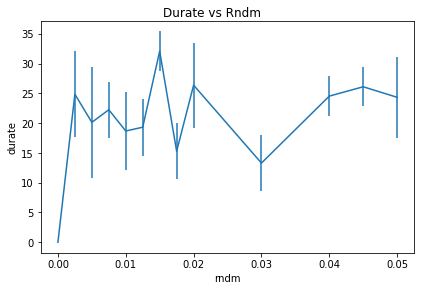

In [18]:
plt.suptitle('Durate vs Rndm', y=1)
plt.errorbar(file[file.columns[0]], file[file.columns[3]], yerr=file[file.columns[4]])
plt.ylabel('durate')
plt.xlabel('rndm')
plt.tight_layout()
plt.show()

## Tempi Attesa

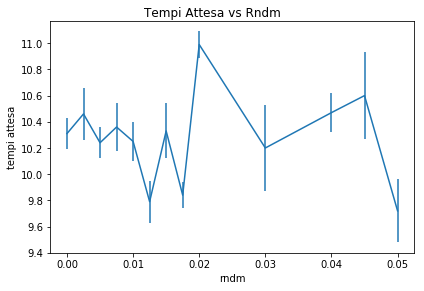

In [19]:
plt.suptitle('Tempi Attesa vs Rndm', y=1)
plt.errorbar(file[file.columns[0]], file[file.columns[5]], yerr=file[file.columns[6]])
plt.ylabel('tempi attesa')
plt.xlabel('rndm')
plt.tight_layout()
plt.show()

# Scatter plot soglie soglini

In [20]:
dataset_scatter = pd.read_excel(r'/home/gdeandrea/Scaricati/soglie_soglini.xlsx', sheet_name=None, usecols=[1])
dataset_keys = list(dataset_scatter.keys())
full_df = pd.concat([dataset_scatter[chiave] for chiave in dataset_scatter.keys()], axis=1)
soglie_075 = pd.read_csv(r'/home/gdeandrea/Scrivania/UNI/Econofisica/MyModels/Epstein/PRESE DATI/A-Valore Soglia/soglie_0,75.csv')
soglini_075 = pd.read_csv(r'/home/gdeandrea/Scrivania/UNI/Econofisica/MyModels/Epstein/PRESE DATI/A-Valore Soglia/soglini_0,75.csv')
soglie_0 = pd.read_csv(r'/home/gdeandrea/Scrivania/UNI/Econofisica/MyModels/Epstein/PRESE DATI/A-Valore Soglia/soglie_0,00.csv')
full_df.insert(loc=4, column='soglini 0.75%', value=soglini_075[soglini_075.columns[0]])
full_df.insert(loc=4, column='soglie 0.75%', value=soglie_075[soglie_075.columns[0]])
full_df.insert(loc=0, column='soglie 0.00%', value=soglie_0[soglie_0.columns[0]])
dummy1 = full_df['soglie 1.5%']
dummy2 = full_df['soglini 1.5%']
full_df = full_df.drop(labels=['soglie 1.5%', 'soglini 1.5%'],axis=1)
full_df.insert(loc=11, column='soglini 1.5%', value=dummy2)
full_df.insert(loc=11, column='soglie 1.5%', value=dummy1)
dummy3 = full_df[full_df.columns[-2]]
dummy4 = full_df[full_df.columns[-1]]
full_df = full_df.drop(labels=full_df.columns[21:23],axis=1)
full_df.insert(loc=21, column='soglie 4.45%', value=dummy3.iloc[:,1])
full_df.insert(loc=22, column='soglini 4.45%', value=dummy4.iloc[:,1])
full_df

,soglie 0.00%,soglie 0.25%,soglini 0.25%,soglie 0.5%,soglini 0.5%,soglie 0.75%,soglini 0.75%,soglie 1%,soglini 1%,soglie 1.25%,...,soglie 2%,soglini 2%,soglie 3%,soglini 3%,soglie 4%,soglini 4%,soglie 4.45%,soglini 4.45%,soglie 5%,soglini 5%
0,192.711304,91.752577,37.480255,201.211088,25.842285,151.954909,17.885231,156.091028,27.979397,172.674173,...,205.614304,43.576338,82.476951,36.300305,79.682660,35.222958,54.185018,32.663528,183.695064,27.802976
1,121.276897,142.870650,28.781827,140.144238,31.495805,147.943110,45.668120,143.246707,13.365063,96.643352,...,178.960132,24.144331,99.515456,29.937080,169.156013,20.548827,73.450322,32.412892,132.897671,41.913730
2,124.385985,175.112235,17.604663,68.901135,13.314852,123.018052,29.366833,185.577652,22.775442,122.021537,...,214.453300,23.744717,78.709208,19.936539,147.088373,26.413344,279.007082,27.064203,49.410126,17.373724
3,142.662094,124.259445,44.797265,126.596253,55.740944,194.197989,22.544687,177.036547,51.638798,138.597809,...,217.659159,NaN,72.137244,24.157187,201.944573,23.123470,130.143806,30.320101,138.181336,36.128853
4,179.899567,168.334002,NaN,194.424799,36.285832,133.642427,14.807964,74.244483,13.123811,183.147526,...,156.960682,NaN,56.232577,30.430746,201.435640,NaN,118.925393,34.338110,186.497643,45.611325
5,121.893038,133.232834,NaN,94.508165,NaN,120.008018,33.335016,145.177526,27.037397,119.152282,...,214.823033,NaN,56.146772,18.981387,188.287619,NaN,69.364507,37.147705,187.400037,16.691912
6,165.208399,186.436846,NaN,200.795864,NaN,104.590904,40.910211,93.713589,NaN,184.023670,...,148.061216,NaN,81.154536,33.411703,143.602642,NaN,60.128556,64.074919,131.713777,54.261113
7,193.498266,75.860594,NaN,163.212448,NaN,97.514237,32.244759,51.212227,NaN,188.445213,...,133.125952,NaN,86.722476,13.153064,60.044949,NaN,64.456764,25.291689,178.112372,NaN
8,177.058244,199.750958,NaN,174.078535,NaN,189.921025,NaN,186.581662,NaN,179.831207,...,201.624316,NaN,59.558831,11.638425,164.621934,NaN,67.477129,24.025843,168.706111,NaN
9,147.408302,119.492543,NaN,205.593277,NaN,166.370526,NaN,192.854021,NaN,190.979371,...,154.445806,NaN,69.217983,52.339521,153.572800,NaN,90.935871,42.511400,181.590596,NaN


In [21]:
x = [0]
for i in range(8):
    x.append((i+1)*0.25)
    x.append((i+1)*0.25)
x.append(3.)
x.append(3.)
x.append(4.)
x.append(4.)
x.append(4.45)
x.append(4.45)
x.append(5.)
x.append(5.)

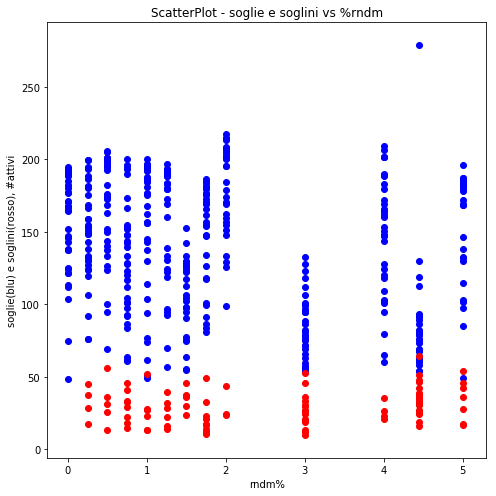

In [28]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
points_list = []
for i in range(25):
    
    label= 'soglie'
    colore='b'
    
    if i%2 == 0 and i != 0 and i!=1:
        label = 'soglini'
        colore = 'r'
    else:
        label= 'soglie'
        colore='b'
        
    a = ax.scatter([x[i] for j in range(len(full_df.iloc[:,i]))], full_df.iloc[:,i], c=colore)
    points_list.append(a)
ax.set_title('ScatterPlot - soglie e soglini vs %rndm')   
ax.set_xlabel('rndm%')
ax.set_ylabel('soglie(blu) e soglini(rosso), #attivi')
fig.tight_layout()
plt.show()